<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" # difference between gpu '0' and '1'

"""
# for reproducibility with server...

os.environ["PYTHONHASHSEED"] = "0"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1" # setting "true"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
"""

import numpy as np
import tensorflow as tf2
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import scipy.io
from sklearn.decomposition import PCA
import pdb

import pandas as pd
import scanpy as sc


import scipy.sparse
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import datetime 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

os.getpid()


2023-07-03 00:01:58.784931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 00:01:59.444646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


1952185

In [2]:
#tf.enable_eager_execution()
np.random.seed(0)
#tf.set_random_seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)
#tf.keras.utils.set_random_seed(0)

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

Building model

In [4]:

data_path = "/home/ajita/Documents/data_integration/Lung/Lung_atlas_public.h5ad"


In [5]:
name = "Lung"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation', # 16
                 'Lung' : 'cell_type', # 
                 'Pancreas' : 'celltype', #
                 'Human_Mouse' : "celltype", #
                 "Human_Retina":"Subcluster" #
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  

2023-07-03 00:02:02.125602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5367 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5


came in load_gene
updated hvg
here [16 16 16 ... 10 10 10]
Data set to work on:
[[0.         0.         0.8323462  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.8091273  ... 0.         0.         0.        ]
 ...
 [0.44821838 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(32472, 2000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32472, 16)
encoder input shape  Tensor("concat:0", shape=(?, 2016), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 26), 

2023-07-03 00:02:14.023342: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 524.0262,db_loss: 2.7695
latent_matrix shape (32472, 10)
(32472,)


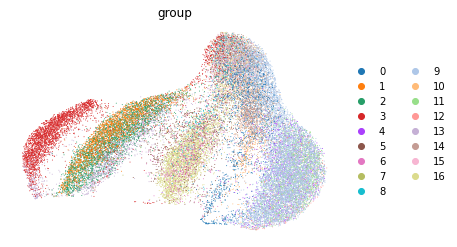

None


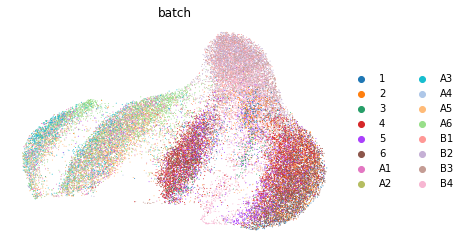

None
Computing NMI ...
Done !
NMI = 0.4106094971118145
Epoch : [1] ,  a_loss = 319.1478,db_loss: 2.2094
Epoch : [2] ,  a_loss = 274.9851,db_loss: 1.8444
Epoch : [3] ,  a_loss = 491.3917,db_loss: 3.0064
Epoch : [4] ,  a_loss = 393.4539,db_loss: 1.6792
Epoch : [5] ,  a_loss = 445.2359,db_loss: 2.1389
Epoch : [6] ,  a_loss = 447.8870,db_loss: 1.6559
Epoch : [7] ,  a_loss = 271.1650,db_loss: 0.3179
Epoch : [8] ,  a_loss = 426.6682,db_loss: 1.6242
Epoch : [9] ,  a_loss = 414.8226,db_loss: 1.4891
Epoch : [10] ,  a_loss = 471.2313,db_loss: 2.3725
Epoch : [11] ,  a_loss = 402.0324,db_loss: 2.2172
Epoch : [12] ,  a_loss = 217.8905,db_loss: 1.6535
Epoch : [13] ,  a_loss = 372.0135,db_loss: 1.7163
Epoch : [14] ,  a_loss = 451.7191,db_loss: 1.4961
Epoch : [15] ,  a_loss = 180.5881,db_loss: 0.7439
Epoch : [16] ,  a_loss = 548.0996,db_loss: 2.7607
Epoch : [17] ,  a_loss = 346.6484,db_loss: 1.6248
Epoch : [18] ,  a_loss = 452.3241,db_loss: 1.6986
Epoch : [19] ,  a_loss = 170.2023,db_loss: 0.9913
Epoc

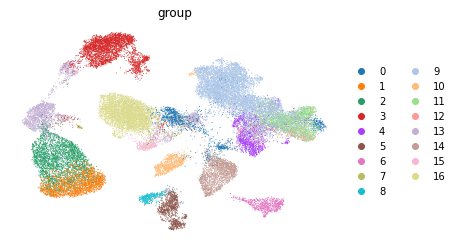

None


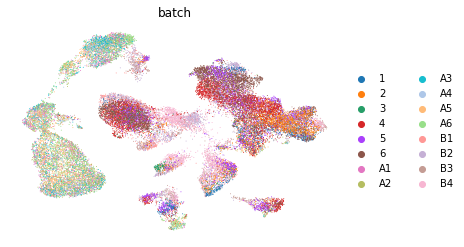

None
Computing NMI ...
Done !
NMI = 0.7175701481055174
Epoch : [51] ,  a_loss = 228.7527,db_loss: 0.6149
Epoch : [52] ,  a_loss = 355.5395,db_loss: 1.6284
Epoch : [53] ,  a_loss = 172.1546,db_loss: 2.2717
Epoch : [54] ,  a_loss = 377.7625,db_loss: 1.4765
Epoch : [55] ,  a_loss = 157.1491,db_loss: 2.4459
Epoch : [56] ,  a_loss = 410.3506,db_loss: 1.1742
Epoch : [57] ,  a_loss = 415.1534,db_loss: 1.6320
Epoch : [58] ,  a_loss = 424.8187,db_loss: 1.9661
Epoch : [59] ,  a_loss = 163.3080,db_loss: 1.1592
Epoch : [60] ,  a_loss = 284.4433,db_loss: 1.2075
Epoch : [61] ,  a_loss = 157.3383,db_loss: 1.7531
Epoch : [62] ,  a_loss = 200.1284,db_loss: 2.3102
Epoch : [63] ,  a_loss = 392.1641,db_loss: 1.2965
Epoch : [64] ,  a_loss = 163.9326,db_loss: 1.6048
Epoch : [65] ,  a_loss = 276.4298,db_loss: 1.5313
Epoch : [66] ,  a_loss = 456.9485,db_loss: 2.6905
Epoch : [67] ,  a_loss = 412.8229,db_loss: 1.9923
Epoch : [68] ,  a_loss = 197.6973,db_loss: 1.7726
Epoch : [69] ,  a_loss = 361.1028,db_loss: 1.

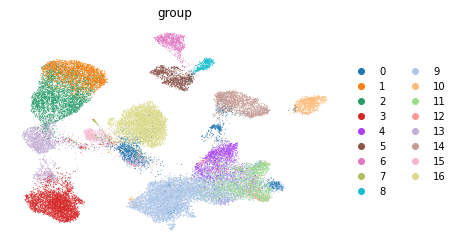

None


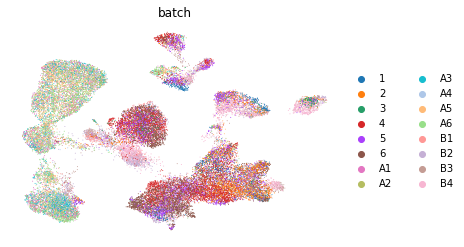

None
Computing NMI ...
Done !
NMI = 0.7154728025235864
Epoch : [101] ,  a_loss = 364.5612,db_loss: 1.6834
Epoch : [102] ,  a_loss = 343.2896,db_loss: 2.4280
Epoch : [103] ,  a_loss = 342.8002,db_loss: 1.3552
Epoch : [104] ,  a_loss = 356.5603,db_loss: 1.6916
Epoch : [105] ,  a_loss = 433.7456,db_loss: 2.3191
Epoch : [106] ,  a_loss = 351.2957,db_loss: 1.6742
Epoch : [107] ,  a_loss = 421.1798,db_loss: 1.8511
Epoch : [108] ,  a_loss = 417.4368,db_loss: 1.8614
Epoch : [109] ,  a_loss = 395.3074,db_loss: 2.5289
Epoch : [110] ,  a_loss = 415.8734,db_loss: 1.2780
Epoch : [111] ,  a_loss = 180.6427,db_loss: 2.3372
Epoch : [112] ,  a_loss = 410.7650,db_loss: 1.8735
Epoch : [113] ,  a_loss = 393.3973,db_loss: 2.0040
Epoch : [114] ,  a_loss = 162.6440,db_loss: 2.4778
Epoch : [115] ,  a_loss = 432.8916,db_loss: 2.5479
Epoch : [116] ,  a_loss = 385.0137,db_loss: 1.7628
Epoch : [117] ,  a_loss = 202.6818,db_loss: 1.5126
Epoch : [118] ,  a_loss = 404.8882,db_loss: 1.7770
Epoch : [119] ,  a_loss = 2

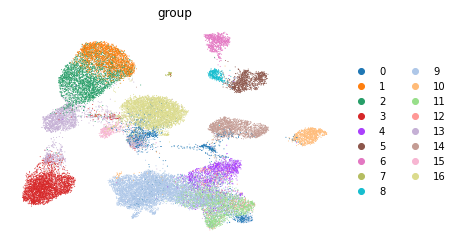

None


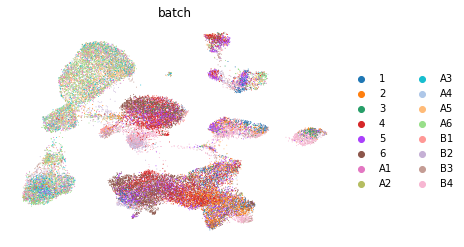

None
Computing NMI ...
Done !
NMI = 0.7054466574366673
Epoch : [151] ,  a_loss = 210.0070,db_loss: 1.7889
Epoch : [152] ,  a_loss = 159.9560,db_loss: 2.4471
Epoch : [153] ,  a_loss = 351.1130,db_loss: 1.5931
Epoch : [154] ,  a_loss = 302.4339,db_loss: 2.1839
Epoch : [155] ,  a_loss = 164.4528,db_loss: 2.2511
Epoch : [156] ,  a_loss = 423.3824,db_loss: 2.2237
Epoch : [157] ,  a_loss = 378.7494,db_loss: 1.8852
Epoch : [158] ,  a_loss = 370.7031,db_loss: 1.6963
Epoch : [159] ,  a_loss = 380.8416,db_loss: 1.3403
Epoch : [160] ,  a_loss = 345.4797,db_loss: 1.6700
Epoch : [161] ,  a_loss = 439.7315,db_loss: 1.2909
Epoch : [162] ,  a_loss = 323.8963,db_loss: 1.0537
Epoch : [163] ,  a_loss = 382.2671,db_loss: 1.7649
Epoch : [164] ,  a_loss = 372.7148,db_loss: 1.8852
Epoch : [165] ,  a_loss = 353.1807,db_loss: 1.9376
Epoch : [166] ,  a_loss = 263.2161,db_loss: 3.0104
Epoch : [167] ,  a_loss = 211.8311,db_loss: 3.1553
Epoch : [168] ,  a_loss = 347.9334,db_loss: 1.8293
Epoch : [169] ,  a_loss = 3

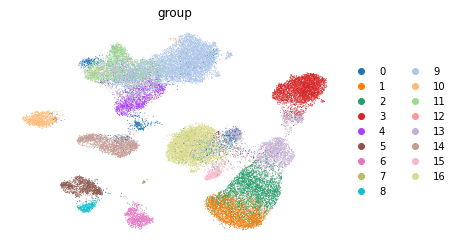

None


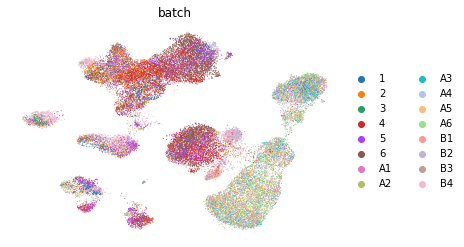

None
Computing NMI ...
Done !
NMI = 0.6852638436252528
Epoch : [201] ,  a_loss = 384.5656,db_loss: 1.7832
Epoch : [202] ,  a_loss = 348.0392,db_loss: 2.2147
Epoch : [203] ,  a_loss = 382.9715,db_loss: 1.8717
Epoch : [204] ,  a_loss = 359.8055,db_loss: 2.1893
Epoch : [205] ,  a_loss = 271.3441,db_loss: 1.6649
Epoch : [206] ,  a_loss = 265.8553,db_loss: 2.3342
Epoch : [207] ,  a_loss = 227.5043,db_loss: 2.4346
Epoch : [208] ,  a_loss = 343.8050,db_loss: 1.8243
Epoch : [209] ,  a_loss = 409.7515,db_loss: 1.6081
Epoch : [210] ,  a_loss = 177.7915,db_loss: 1.8548
Epoch : [211] ,  a_loss = 385.9406,db_loss: 1.8027
Epoch : [212] ,  a_loss = 382.5089,db_loss: 2.3078
Epoch : [213] ,  a_loss = 397.5947,db_loss: 1.5783
Epoch : [214] ,  a_loss = 333.6961,db_loss: 0.9157
Epoch : [215] ,  a_loss = 269.6579,db_loss: 2.3955
Epoch : [216] ,  a_loss = 170.3764,db_loss: 1.6429
Epoch : [217] ,  a_loss = 412.0551,db_loss: 1.7930
Epoch : [218] ,  a_loss = 409.6658,db_loss: 2.8263
Epoch : [219] ,  a_loss = 3

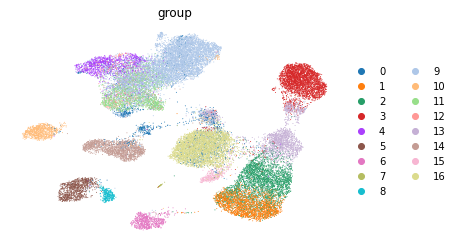

None


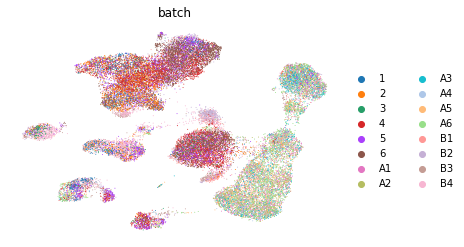

None
Computing NMI ...
Done !
NMI = 0.6901553756739868
Epoch : [251] ,  a_loss = 321.1432,db_loss: 1.2137
Epoch : [252] ,  a_loss = 359.8803,db_loss: 2.8832
Epoch : [253] ,  a_loss = 158.7582,db_loss: 2.1515
Epoch : [254] ,  a_loss = 382.4207,db_loss: 2.0672
Epoch : [255] ,  a_loss = 333.6765,db_loss: 2.8761
Epoch : [256] ,  a_loss = 366.5283,db_loss: 3.4341
Epoch : [257] ,  a_loss = 251.6257,db_loss: 2.9893
Epoch : [258] ,  a_loss = 385.2889,db_loss: 2.2197
Epoch : [259] ,  a_loss = 422.3326,db_loss: 1.6237
Epoch : [260] ,  a_loss = 405.1100,db_loss: 1.9556
Epoch : [261] ,  a_loss = 228.1337,db_loss: 1.4908
Epoch : [262] ,  a_loss = 420.7464,db_loss: 0.9989
Epoch : [263] ,  a_loss = 412.5972,db_loss: 3.2291
Epoch : [264] ,  a_loss = 405.0679,db_loss: 2.0931
Epoch : [265] ,  a_loss = 334.8829,db_loss: 1.2138
Epoch : [266] ,  a_loss = 336.0135,db_loss: 1.7837
Epoch : [267] ,  a_loss = 149.8524,db_loss: 1.7075
Epoch : [268] ,  a_loss = 349.8747,db_loss: 3.0602
Epoch : [269] ,  a_loss = 4

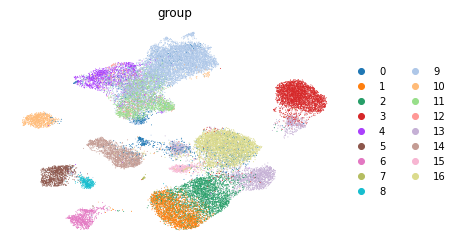

None


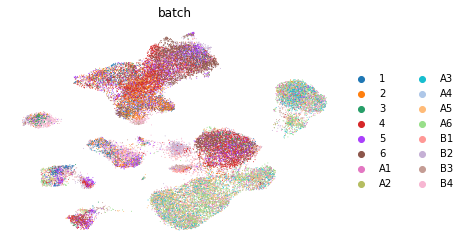

None
Computing NMI ...
Done !
NMI = 0.6808762522947677


In [6]:
    
import src.model_wo_Dis as model


run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

